#Step 1: Load the Data

Link  https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles

Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. The class labels are:

| Label |	Description |
--- | --- |
| 0	| T-shirt/top
| 1	| Trouser
| 2	| Pullover
| 3	| Dress
| 4	| Coat
| 5	| Sandal
| 6	| Shirt
| 7	| Sneaker
| 8	| Bag
| 9	| Ankle boot

### Usage:
from keras.datasets import fashion_mnist

> (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Returns:
2 tuples:
1. x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
2. y_train, y_test: uint8 array of labels (integers in range 0-9) with shape (num_samples,).

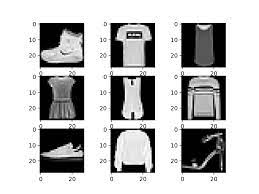

##1a) Import All Libraries

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

##1b) Import the Data + Train Test Split

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


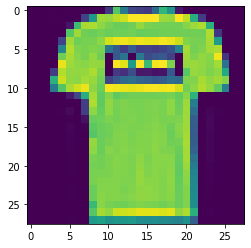

In [6]:
plt.imshow(X_train_full[1])

In [7]:
X_train_full[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [9]:
X_train_full[1].shape

#we see that the handwritten digit 0 
#in x_train[1] is represented by 28 rows x 28 columns of data
#each represents 0 (black) to 255 (white)  

(28, 28)

In [11]:
y_train_full[1]

#| Label |	Description |
#--- | --- |
#| 0	| T-shirt/top
#| 1	| Trouser
#| 2	| Pullover
#| 3	| Dress
#| 4	| Coat
#| 5	| Sandal
#| 6	| Shirt
#| 7	| Sneaker
#| 8	| Bag
#| 9	| Ankle boot

0

In [12]:
display(y_train_full)

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
print(len(np.unique(y_train_full)))
#to see how many classes there are... 10 classes

10


Label: 9


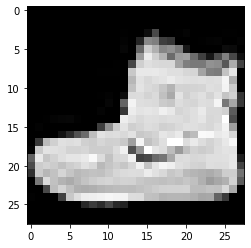

Label: 0


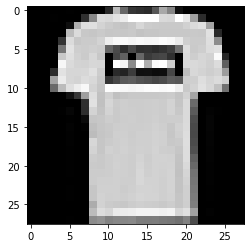

Label: 0


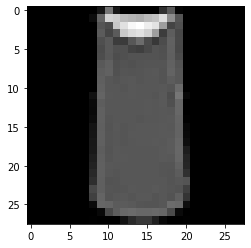

Label: 3


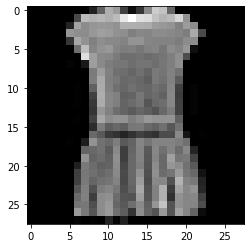

Label: 0


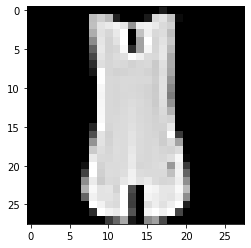

In [18]:
for i in range(5):
  print(f'Label: {y_train_full[i]}')
  plt.imshow(X_train_full[i], cmap='gray')
  plt.show()

##1c) Creating Class Names

In [19]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

##1d) Reshape the Data, or rather, add in additional Parameter --> Channels (RGB)

In [20]:
X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

#this means that we convert the x_train to include another parameter called Channel

##1e) Data normalization
We  normalize the data dimensions so that they are of approximately the same scale.

In [21]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

#pictures are from grayscale 0 to 255, so we divide by 255 to 
#normalize from 0 to 1 probability

#0 is pure black
#255 (or 1) is pure white

##1f) Split the data into train/validation/test datasets
In the earlier step of importing the date, we had 60,000 datasets for training and 10,000 test datasets. Now we further split the training data into train/validation. Here is how each type of dateset is used in deep learning:

* __Training data__ — used for training the model (x55,000 rows)
* __Validation data__ — used for tuning the hyperparameters and evaluate the models (x5000 rows)
* __Test data__ — used to test the model after the model has gone through initial vetting by the validation set. (x10,000 rows)

In [22]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [30]:
X_valid.shape 
#5,000 rows of 28 x 28 grayscale images (1 channel)

(5000, 28, 28, 1)

In [31]:
X_train.shape 
#55,000 rows of 28 x 28 grayscale images (1 channel)

(55000, 28, 28, 1)

In [27]:
y_valid.shape 
#5,000 rows of labelled data corresponding to the images

(5000,)

In [28]:
y_train.shape 
#55,000 rows of labelled data corresponding to the images

(55000,)

In [29]:
X_test.shape
#10,000 rows of 28 x 28 grayscale images (1 channel)

(10000, 28, 28, 1)

##1g) Presetting the Random Seeds (not entirely needed...)

In [33]:
np.random.seed(42)
tf.random.set_seed(42)

#this step may be skipped because its not entirely important...



---



#Step 2: Build the Model Architecture

In [35]:
model = keras.models.Sequential()

#The CNN Layers...
model.add(keras.layers.Conv2D(filters = 32, 
                              kernel_size = (3, 3), 
                              strides=1, 
                              padding='valid', 
                              activation='relu', 
                              input_shape=(28, 28, 1)))
#Pooling...
model.add(keras.layers.MaxPooling2D((2, 2)))

#The ANN Layers....
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


##2a) Summary of the Model

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 300)               1622700   
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                      

##2b) Visualize the Model

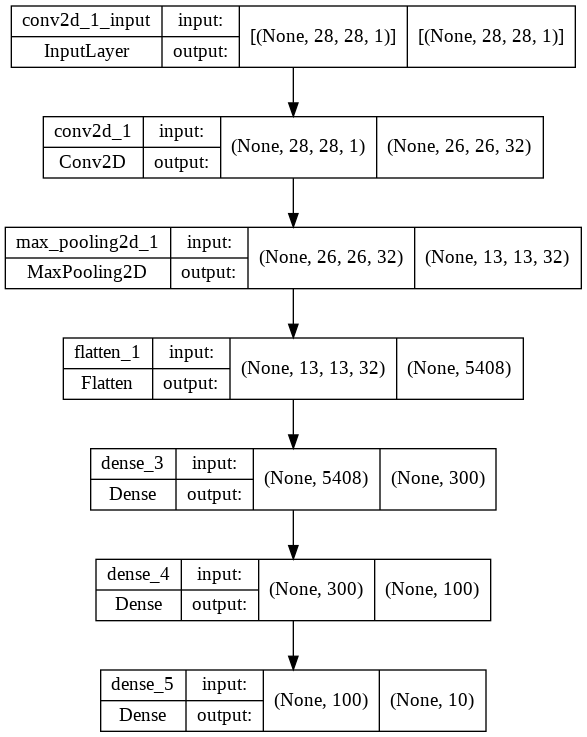

In [37]:
import pydot
keras.utils.plot_model(model, 'model.png', show_shapes=True)



---



#Step 3: Compile the Model

In [38]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

#sparse_categorical_crossentropy is slower to train
#but easier to code
#try converting to categorical_crossentropy for faster processing

#sparse_categorical_crossentropy dun need "One-Hot Encoding" for 
#both inputs and outputs

#SGD is for cross entropy --> Classification
#RMSprop is for Regression



---



#Step 4: Train the Model

In [39]:
model_history = model.fit(
                          X_train, y_train, 
                          epochs=30,
                          batch_size= 64,
                          validation_data=(X_valid, y_valid))

Epoch 1/30
860/860 [==============================] - 38s 44ms/step - loss: 0.8468 - accuracy: 0.7083 - val_loss: 0.8137 - val_accuracy: 0.7014
Epoch 2/30
860/860 [==============================] - 38s 45ms/step - loss: 0.5360 - accuracy: 0.8066 - val_loss: 0.4983 - val_accuracy: 0.8106
Epoch 3/30
860/860 [==============================] - 39s 45ms/step - loss: 0.4787 - accuracy: 0.8271 - val_loss: 0.9614 - val_accuracy: 0.6952
Epoch 4/30
860/860 [==============================] - 39s 45ms/step - loss: 0.4423 - accuracy: 0.8420 - val_loss: 0.4144 - val_accuracy: 0.8568
Epoch 5/30
860/860 [==============================] - 39s 45ms/step - loss: 0.4185 - accuracy: 0.8491 - val_loss: 0.4300 - val_accuracy: 0.8472
Epoch 6/30
860/860 [==============================] - 39s 45ms/step - loss: 0.3953 - accuracy: 0.8577 - val_loss: 0.3779 - val_accuracy: 0.8696
Epoch 7/30
860/860 [==============================] - 40s 46ms/step - loss: 0.3781 - accuracy: 0.8654 - val_loss: 0.4079 - val_accuracy:



---



#Step 5: Save the Model

In [40]:
model.save('classification.h5')

#h5 means HDF5 format
#it saves the model configuration, weights
#bias and all hyperparameters



---



#Step 6: Load the Model

https://www.alvinang.sg/s/classification.h5

In [ ]:
# model = keras.models.load_model('classification.h5')

#though not needed here, we will load this model for future use
#so that we don't have to run the 30 epochs as it takes very long



---



#Step 7: Running a Prediction

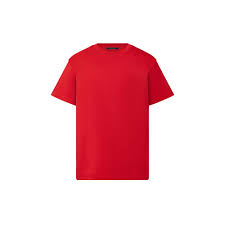

##7a) Importing Image Reshaping Libraries

In [41]:
import numpy as np
import cv2
from skimage import img_as_ubyte    
from skimage.color import rgb2gray
from keras.models import load_model

##7b) Importing and Previewing the T Shirt Image

In [42]:
shirt = cv2.imread('/content/t-shirt.jpg')

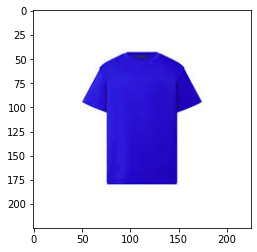

In [43]:
plt.imshow(shirt)

##7c) Re-Coloring / Re-Shaping / Re-Sizing

In [44]:
shirt_gray = rgb2gray(shirt)
shirt_gray_u8 = img_as_ubyte(shirt_gray)

In [45]:
(thresh, im_binary) = cv2.threshold(shirt_gray_u8, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

In [46]:
img_resized = cv2.resize(im_binary,(28,28))

In [47]:
im_gray_invert = 255 - img_resized

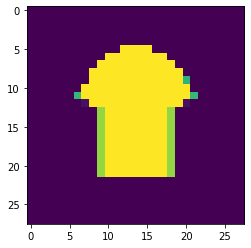

In [48]:
plt.imshow(im_gray_invert)

In [49]:
im_final = im_gray_invert.reshape(1,28,28,1)



---



##7d) Predicting

In [50]:
ans = model.predict(im_final)

In [51]:
ans = np.argmax(ans,axis=1)[0]
print(ans)

0




---



#Step 8: Visualize the Loss or Error

In [54]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
epoch = range(len(loss))

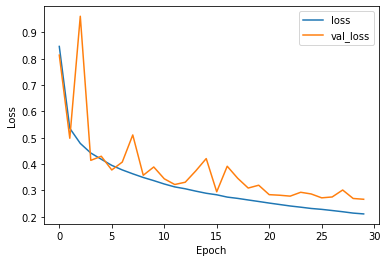

In [55]:
import matplotlib.pyplot as plt

plt.plot(epoch, loss, label = "loss")
plt.plot(epoch, val_loss, label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



---



#Step 9: Visualize the Accuracy

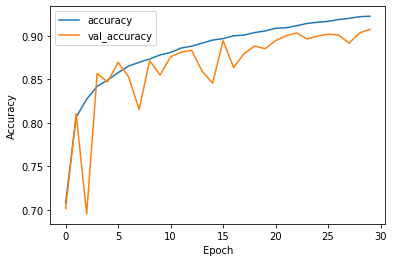

In [56]:
plt.plot(epoch, acc, label = 'accuracy')
plt.plot(epoch, val_acc, label = 'val_accuracy')
plt.xlabel("Epoch")
plt.ylabel('Accuracy')
plt.legend()
plt.show()



---



#Step 10: Evaluate the Model

In [57]:
ev = model.evaluate(X_test_n, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.2737 - accuracy: 0.9014


In [58]:
ev
#Accuracy achieved of 90%

[0.2736997604370117, 0.9014000296592712]



---



#THE END



---

